In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape(y.shape[0],1)
print("Dimension de y",y.shape)
print("Dimension de X",X.shape)


Dimension de y (100, 1)
Dimension de X (100, 2)


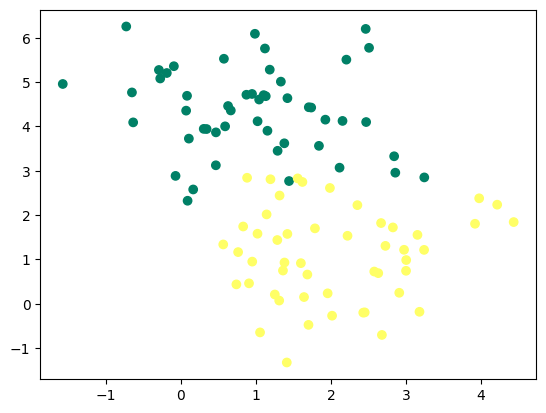

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")
plt.show()

In [4]:
def intitialisation(X):
    W=np.random.randn(X.shape[1],1 )
    b=np.random.randn(1)
    return W,b

In [5]:
def model (X,W,b):
    Z=X.dot(W)+b
    A=1/((1+np.exp(-Z)))
    return A

In [6]:
def log_loss(A,y,m=len(y)):
    return -1/m*np.sum(y*np.log(A)+(1-y)*np.log(1-A))

In [7]:
def gradients(A,X,y,m=len(y)):
    dW=1/m*np.dot(X.T,A-y)
    db=1/m*np.sum(A-y) 
    return (dW,db)

In [8]:
def update(dW,db,W,b,learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

In [9]:
def predict(X,W,b):
    A=model(X,W,b)
    return A>=0.5

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
def artificial_neuron(X,y,learning_rate=0.1,n_iter=150):
    W,b=intitialisation(X)
    Loss_list=[]
    for i in range(n_iter):
        A=model(X,W,b)
        Loss=log_loss(A,y)
        Loss_list.append(Loss)
        dW,db=gradients(A,X,y)
        W,b=update(dW,db,W,b,learning_rate)
    y_pred=predict(X,W,b)
    print(accuracy_score(y,y_pred))
    plt.plot(Loss_list)
    plt.show()
    return (W,b)

0.88


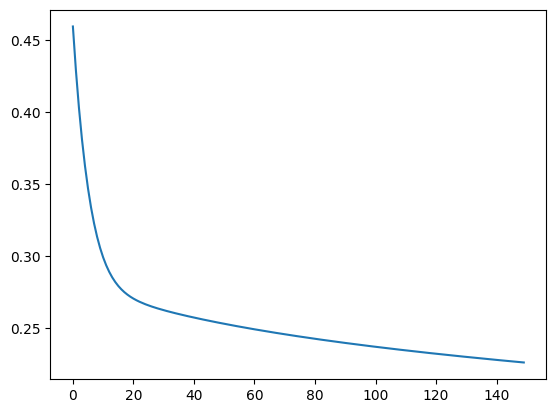

In [12]:
W,b=artificial_neuron(X,y)

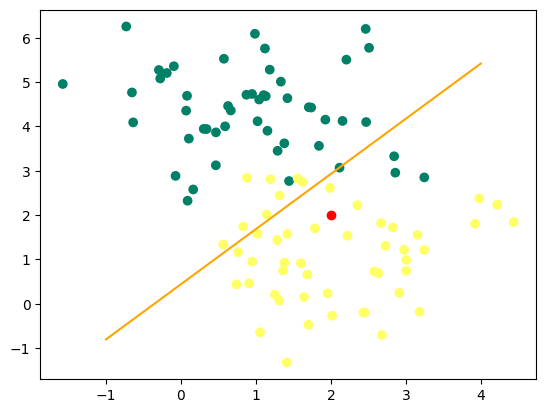

In [13]:
new_plant=np.array([2,2])
x0=np.linspace(-1,4,100)
x1=(-W[0]*x0-b)/W[1]
plt.plot(x0,x1 ,c="orange")
plt.scatter(new_plant[0],new_plant[1],c="r")
plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")
plt.show()

In [14]:
predict(new_plant,W,b)

array([ True])